# A1: Regression Model Development (Individual)

Machine Learning - DAT-5303 - BMBAN2<br>
Lars Marius Strømberg Jappée

# References


Kariniemi, V., & Rosti, J. (1988). Maternal smoking and alcohol consumption <br>
as determinants of birth weight in an unselected study population. Journal of <br>
perinatal medicine, 16(3), 249–252 <br>
https://doi.org/10.1515/jpme.1988.16.3.249<br>

BHoward E. LeWine (January 29, 2020), Drinking a little alcohol early in pregnancy <br>
may be okay ,Harvard Health Publishing, URL:<br>
https://www.health.harvard.edu/blog/study-no-connection-between-drinking-alcohol-early-in-pregnancy-and-birth-problems-201309106667


In [1]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization essentials
import seaborn as sns # enhanced data visualization
import numpy as np 
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf # regression modeling
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# specifying file
file = "./birthweight_low.xlsx"

# import excel file
birthweight = pd.read_excel(io = file,
                            header = 0,
                            sheet_name = 0)

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


print(birthweight.info())



Size of Original Dataset
------------------------
Observations: 196
Features:     34

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mage         196 non-null    int64  
 1   meduc        193 non-null    float64
 2   monpre       196 non-null    int64  
 3   npvis        193 non-null    float64
 4   fage         196 non-null    int64  
 5   feduc        189 non-null    float64
 6   omaps        196 non-null    int64  
 7   fmaps        196 non-null    int64  
 8   cigs         196 non-null    int64  
 9   drink        196 non-null    int64  
 10  male         196 non-null    int64  
 11  mwhte        196 non-null    int64  
 12  mblck        196 non-null    int64  
 13  moth         196 non-null    int64  
 14  fwhte        196 non-null    int64  
 15  fblck        196 non-null    int64  
 16  foth         196 non-null    int64  
 17  bwght

Birth weight data frame includes several features without observations and names, <br>
these needs to be dropped, with the fmaps and omaps features, as these are not <br>
indicative of a babies weight, but measures during birth, and could rather be a <br>
result of the birth weight.

In [2]:
# dropping unwanted features
birthweight.drop(birthweight.columns[18:34], axis = 1, inplace=True)
birthweight.drop('omaps', axis = 1, inplace=True)
birthweight.drop('fmaps', axis = 1, inplace=True)

# formatting and printing the dimensions of the dataset to see that features has been dropped
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     16



# Missing Values

In [3]:
# summing together the results per column
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [4]:
# checking description of features with missing values
print(birthweight["npvis"].describe())
print(birthweight["feduc"].describe())
print(birthweight["meduc"].describe())

count    193.000000
mean      11.601036
std        4.267293
min        2.000000
25%       10.000000
50%       12.000000
75%       12.000000
max       35.000000
Name: npvis, dtype: float64
count    189.000000
mean      13.846561
std        2.634217
min        1.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: feduc, dtype: float64
count    193.000000
mean      13.911917
std        2.055864
min        8.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: meduc, dtype: float64


As they in theory could be continuous data and therefore suitable for a mean, <br>
for this data imputing mode would better reflect the type of observation.

In [5]:
# imputing with mode
# meduc
fill = birthweight["meduc"].mode()[0]
birthweight['meduc'].fillna(value = fill,
                            inplace = True)

# npvis
fill = birthweight["npvis"].mode()[0]
birthweight['npvis'].fillna(value = fill,
                            inplace = True)

# feduc
fill = birthweight["feduc"].mode()[0]
birthweight['feduc'].fillna(value = fill,
                            inplace = True)

# making sure all missing values have been taken care of
birthweight.isnull().sum().any()

False

# Feature Engineering

## Classifiying 

In [6]:
# creating list of data for looping(not necessrily continuous data)
continuous_data = ['bwght', 'mage', 'meduc', 'feduc', 'fage', 'cigs', 'drink', 'npvis']

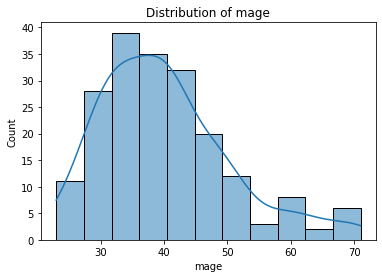

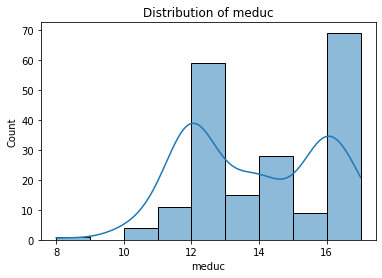

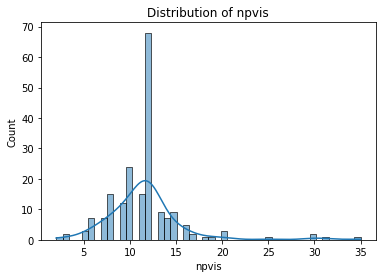

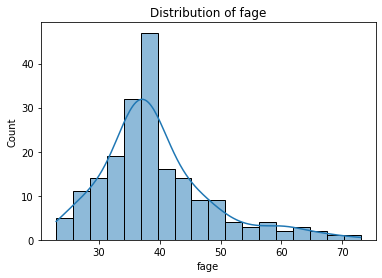

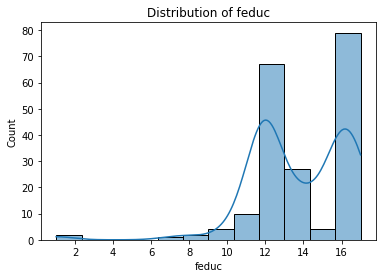

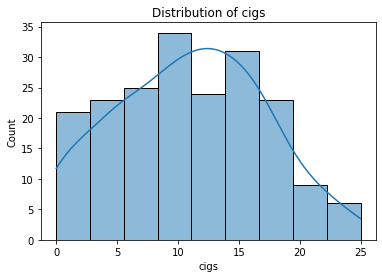

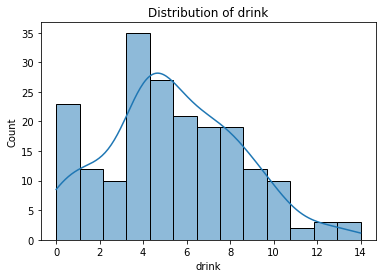

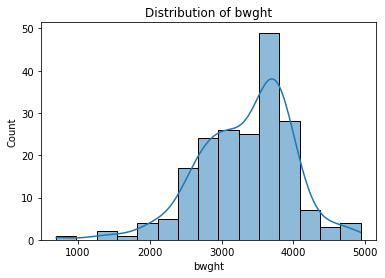

In [7]:
# loop to show distribution of chosen data
for column in birthweight:

    if column in continuous_data:
        sns.histplot(data   = birthweight,
                     x      = column,
                     kde    = True)

        plt.title(label   = f"Distribution of {column}")
        plt.xlabel(xlabel = column)
        plt.ylabel(ylabel = "Count")
        plt.show()


## Correlation 

Seeing correlations to see if there is any interesting relationships that could<br>
be further explored and engineered.

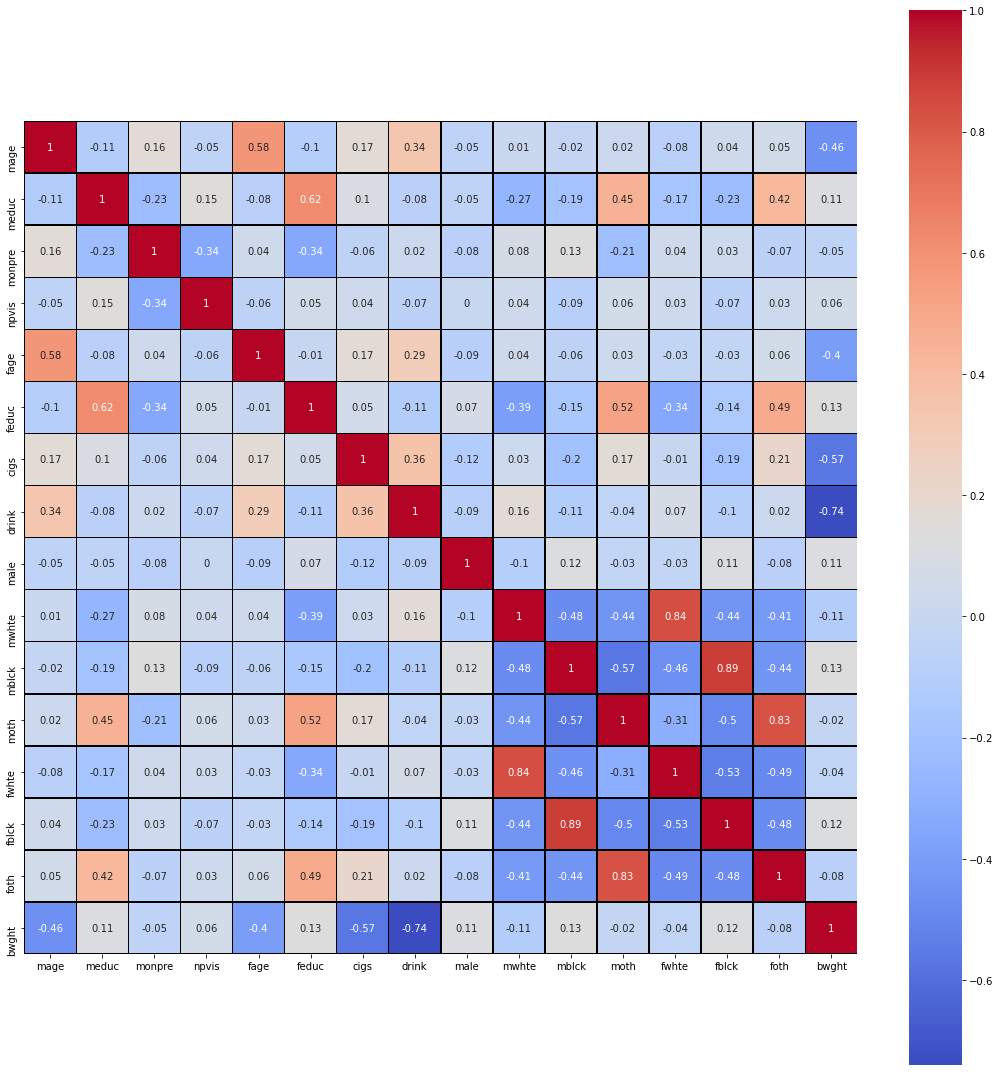

In [8]:
# creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(15,15))

# setting up the visual correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

# displaying
plt.tight_layout()
plt.show()

## Log transforming 

In [9]:
# log transforming skewed explanatory features
birthweight['log_bwght'] = np.log(birthweight['bwght'])
birthweight['log_mage'] = np.log(birthweight['mage'])
birthweight['log_fage'] = np.log(birthweight['fage'])
birthweight['log_cigs'] = np.log(birthweight['cigs'] + 0.001) # adding + 0.001 to avoid error with 0 values
birthweight['log_drink'] = np.log(birthweight['drink'] + 0.001)
birthweight['log_npvis'] = np.log(birthweight['npvis'] + 0.001)

In [10]:
# creating a correlation matrix for comparing log and non log correlations.
log_corr = birthweight.loc[ : , ['mage',
                                 'log_mage',
                                 'bwght',
                                 'log_bwght',
                                 'fage', 
                                 'log_fage',
                                 'cigs',
                                 'log_cigs',
                                 'drink',
                                 'log_drink',
                                 'npvis',
                                 'log_npvis']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)
# setting up a correlation matrix
log_corr.loc[ ['mage', 'log_mage', 'fage', 'log_fage', 'cigs', 'log_cigs',
               'drink', 'log_drink', 'npvis', 'log_npvis'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
mage,-0.46,-0.50
log_mage,-0.42,-0.44
fage,-0.40,-0.41
log_fage,-0.38,-0.39
cigs,-0.57,-0.55
log_cigs,-0.39,-0.34
drink,-0.74,-0.70
log_drink,-0.44,-0.39
npvis,0.06,0.11
log_npvis,0.16,0.24


Only mother age and npvis of the log features had a higher correlation than non log.<br>
Some of these features might be tested. but so far it seems like the standard will be used.

## Boxplot

In [11]:
# defining boxplot function for easier assesment of different features
def bwght_boxplot(x):
    
    # setting figure size
    fig, ax = plt.subplots(figsize = (15, 10))


    # developing a boxplot
    sns.boxplot(x    = x,
                y    = 'bwght',
                data = birthweight)



    # titles and labels
    plt.title(label   = f'Relationship between Birth Weight and {x}')
    plt.xlabel(xlabel = x)
    plt.ylabel(ylabel = 'Birth Weight')


    # displaying the plot
    plt.tight_layout
    plt.show()

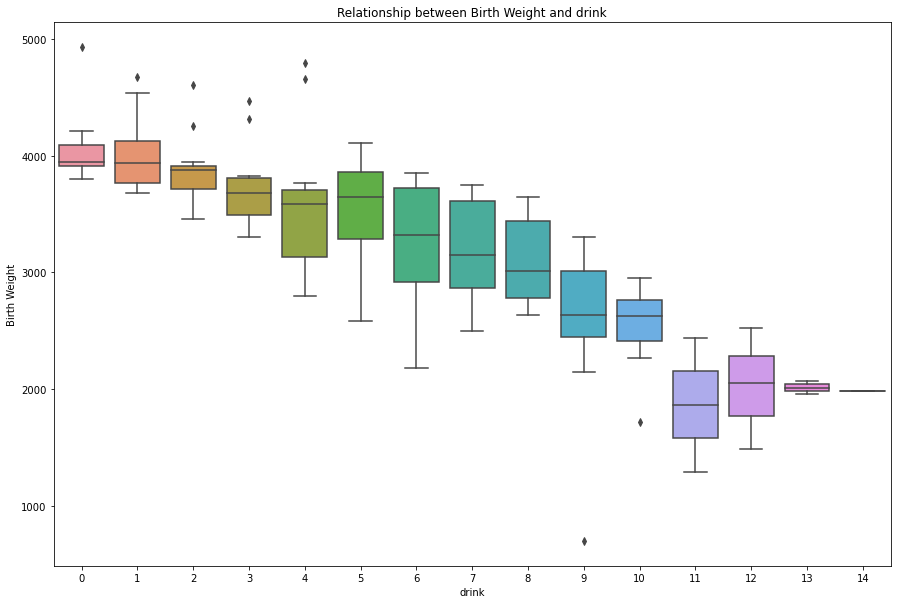

In [12]:
# boxplot display function for use with different features
bwght_boxplot('drink')

In [13]:
# checking number of values for each count to assess for potential new engineered features.  
birthweight['drink'].value_counts().sort_index()

0     11
1     12
2     12
3     10
4     35
5     27
6     21
7     19
8     19
9     12
10    10
11     2
12     3
13     2
14     1
Name: drink, dtype: int64

## Categories

Creating categories from feature to modify for non linear trend.

In [14]:
# creating a category column for when people started prenatal care
birthweight['monpre_condensed'] = 0

# using itterrows to replace previous column with new column formated to fit
for index, col in birthweight.iterrows():
    
    # conditionals to change the values in the new column
    if birthweight.loc[index, 'monpre'] == 1:
        birthweight.loc[index, 'monpre_condensed'] = 'mone'
        
    elif birthweight.loc[index, 'monpre'] == 2:
        birthweight.loc[index, 'monpre_condensed'] = 'mtwo'

    elif birthweight.loc[index, 'monpre'] > 2:
        birthweight.loc[index, 'monpre_condensed'] = 'mthree_or_later'

In [15]:
# creating a category column for has attended equiavalent for college degree
# amount of years
birthweight['feduc_college'] = 0

# using itterrows to replace previous column with new column formated to fit
for index, col in birthweight.iterrows():
    
    # conditionals to change the values in the new column
    if birthweight.loc[index, 'feduc'] >=16:
        birthweight.loc[index, 'feduc_college'] = 1
        
    elif birthweight.loc[index, 'feduc'] < 16:
        birthweight.loc[index, 'feduc_college'] = 0

In [16]:
# creating a category column for people who drink excessively
# more than amount "approved" by research
birthweight['cigs_drink'] = 0

# using itterrows to replace previous column with new column formated to fit
for index, col in birthweight.iterrows():
    
    # conditionals to change the values in the new column
    if birthweight.loc[index, 'drink'] > 7 and birthweight.loc[index, 'cigs'] > 0:
        birthweight.loc[index, 'cigs_drink'] = 1

In [17]:
# checking number of observations in each category, for each new feature
birthweight['feduc_college'].value_counts().sort_index()

0    117
1     79
Name: feduc_college, dtype: int64

## Dummies

In [18]:
# getting dummies from categories
birthweight = pd.get_dummies(data = birthweight,
               dtype = int)

# dropping one dummy column
birthweight.drop('monpre_condensed_mone', axis = 1, inplace=True)

## Feature combining

In [19]:
# Finding the monthly amount of prenatal visits by multiplying with the amount
# of months with prenatal care, estimated with month prenatal care began
birthweight['monthly_npvis'] = birthweight['npvis'] / (10 - birthweight['monpre'])

# average age of mother and father
birthweight['mage_fage'] = (birthweight['mage'] + birthweight['fage']) / 2

# average eduaction level of mother and father
birthweight['meduc_feduc'] = (birthweight['meduc'] + birthweight['feduc']) / 2

# squaring features to assuming that the relationship wears off at a certain point
birthweight['fage2'] = birthweight['fage'] * birthweight['fage']
birthweight['mage2'] = birthweight['mage'] * birthweight['mage']
birthweight['mage_fage2'] = birthweight['mage_fage'] * birthweight['mage_fage']
birthweight['npvis2'] = birthweight['npvis'] * birthweight['npvis']
birthweight['cigs2'] = birthweight['cigs'] * birthweight['cigs']
birthweight['drink2'] = birthweight['drink'] * birthweight['drink']
birthweight['monpre2'] = birthweight['monpre'] * birthweight['monpre']
birthweight['monthly_npvis2'] = birthweight['monthly_npvis'] * birthweight['monthly_npvis']

# switching to months with prenatal care, and squaring to show effect lowering
# as the care begins later
birthweight['monwpre'] = 10 - birthweight['monpre']
birthweight['monwpre2'] = birthweight['monwpre'] * birthweight['monwpre']

# trying to show effect of long term drinking, assuming drinking started at 
# legal age
birthweight['drink_pyr'] = (birthweight['drink'] * 52) * (birthweight['mage'] - 18)

# trying to show effect of long term smoking, assuming smoking started at 
# legal age
birthweight['cigs_pyr'] = (birthweight['cigs'] * 7 * 52) * (birthweight['mage'] - 18)

# amplifying the effect of drinking on female fetuces, as research has shown 
# this effect is increased for females, and should have no effect on males
birthweight['female_drink'] = (birthweight['male']-1)*(birthweight['male']-1) * birthweight['drink']

### New feature log 

In [20]:
# log of new feature with potential skewness
birthweight['log_mage_fage'] = np.log(birthweight['mage_fage'])

# Regression Testing

In [21]:
# using loop to check value spread in columns
for column in birthweight:
    print(birthweight[column].value_counts().sort_index())

23     2
24     3
25     2
26     2
27     2
28     4
29    10
30     8
31     6
32     8
33    12
34     9
35     5
36     5
37     7
38    12
39     7
40     9
41     8
42    14
43     5
44     5
45     1
46     2
47     6
48     7
49     4
50     4
51     4
52     2
53     2
54     1
56     1
57     1
58     2
59     1
60     1
61     3
62     1
64     2
67     1
68     1
69     1
70     1
71     2
Name: mage, dtype: int64
8.0      1
10.0     4
11.0    11
12.0    59
13.0    15
14.0    28
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    68
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name: npvis, dtype: int64
23     2
24     1
25     2
26     7
27     1
28     3
29     5
30     5
31     4
32   

In [22]:
# creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght                               1.00
log_bwght                           0.97
monpre_condensed_mtwo               0.18
log_npvis                           0.16
meduc_feduc                         0.13
mblck                               0.13
feduc                               0.13
fblck                               0.12
male                                0.11
meduc                               0.11
monthly_npvis                       0.07
npvis                               0.06
monwpre2                            0.06
monwpre                             0.05
monthly_npvis2                      0.02
feduc_college                       0.01
npvis2                             -0.01
moth                               -0.02
monpre2                            -0.03
fwhte                              -0.04
monpre                             -0.05
foth                               -0.08
mwhte                              -0.11
monpre_condensed_mthree_or_later   -0.18
female_drink    

In [23]:
# printing list of columns for regression
for column in birthweight:
    print(f"{column} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_bwght +
log_mage +
log_fage +
log_cigs +
log_drink +
log_npvis +
feduc_college +
cigs_drink +
monpre_condensed_mthree_or_later +
monpre_condensed_mtwo +
monthly_npvis +
mage_fage +
meduc_feduc +
fage2 +
mage2 +
mage_fage2 +
npvis2 +
cigs2 +
drink2 +
monpre2 +
monthly_npvis2 +
monwpre +
monwpre2 +
drink_pyr +
cigs_pyr +
female_drink +
log_mage_fage +


In [24]:
# feature testing in OLS regression

# setting features for fitting
lm_best = smf.ols(formula =  """bwght ~
mage +
mage2 +
npvis +
npvis2 +
cigs +
cigs2 +
drink +
monthly_npvis +
mage_fage +
mage_fage2 +
meduc_feduc +
drink_pyr +
cigs_drink
""",
data = birthweight)

# fitting and printing results
results = lm_best.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     39.61
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.17e-46
Time:                        00:06:24   Log-Likelihood:                -1414.5
No. Observations:                 196   AIC:                             2857.
Df Residuals:                     182   BIC:                             2903.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3002.9061    549.939      5.460

# Setting up Final Data Frame

Creating a data frame with features for final model.

In [25]:
# choosing final features for model
variables = ['bwght',
             'drink',
             'cigs',
             'drink2']

# creating final data frame for model
birthweight_final = birthweight.loc[: , variables]

# Regressions

In [26]:
# preparing explanatory variable data
birthweight_data = birthweight_final.drop(['bwght'],
                               axis = 1)

# preparing response variables
birthweight_target = birthweight_final.loc[ : , 'bwght']

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 3)
y-side: (147,)


Testing Data
------------
X-side: (49, 3)
y-side: (49,)



## OLS 

In [27]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# saving the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score  = lr.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

# space to make it easier to read output
print()

# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data.columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

OLS Training Score : 0.6581
OLS Testing Score  : 0.7016
OLS Train-Test Gap : 0.0435

('intercept', 4300.71)
('drink', -48.95)
('cigs', -38.94)
('drink2', -6.95)


## Lasso 

## ARD 

In [28]:
# INSTANTIATING a model object
# alpha adjusted to reduce overfitting to train set
lasso_model = sklearn.linear_model.Lasso(alpha = 3, max_iter = 1000,
                                         normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4)
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

# space to make it easier to read output
print()

# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
# checking the results
for pair in lasso_model_lst:
    print(pair)
    
    
    
    
# gap to line up next to ARD for comparison

Lasso Training Score : 0.6538
Lasso Testing Score  : 0.6974
Lasso Train-Test Gap : 0.0436

('intercept', 4219.1686)
('drink', -45.3283)
('cigs', -34.7751)
('drink2', -6.5009)


In [29]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(n_iter = 1000) # default magitude


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4) # using R-square
ard_test_score  = ard_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

# space to make it easier to read output
print()

# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)


Training Score: 0.6579
Testing Score : 0.6966
ARD Train-Test Gap : 0.0387

('intercept', 4272.54)
('drink', -40.30204)
('cigs', -38.53359)
('drink2', -7.5445)


## KNN

In [30]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(birthweight_data)

# TRANSFORMING our data after fit
x_scaled = scaler.transform(birthweight_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

# preparing training and testing sets for standardized data
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# setting a range of 1 to 50 neighbors
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))    
      
    
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :', knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)



KNN Training Score: 0.6339
KNN Testing Score : 0.6773
KNN Train-Test Gap: 0.0434


# Final Results

## Final Results Comment

While the process of elimination started with removing variables that had low<br> 
coefficients and high p-values in the statsmodel regression. The big changes<br> 
came with the coefficients in the Lasso and ARD models.

There were several feature selections and engineered  features that gave a<br>
higher R-squared for the train set, as the focus was on the test set, the final<br>
selection was over fitted to the test set as it performed higher on the test set<br>
than the train set.

## Final Output

In [31]:
# comparing results
print(f"""
Model      Train Score      Test Score      T-T Gap
-----      -----------      ----------      -------
OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}
*Lasso     {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap}
KNN        {knn_reg_score_train}           {knn_reg_score_test}          {knn_reg_test_gap}

*Final Model
""")




Model      Train Score      Test Score      T-T Gap
-----      -----------      ----------      -------
OLS        0.6581           0.7016            0.0435
*Lasso     0.6538           0.6974          0.0436
ARD        0.6579           0.6966          0.0387
KNN        0.6339           0.6773          0.0434

*Final Model

